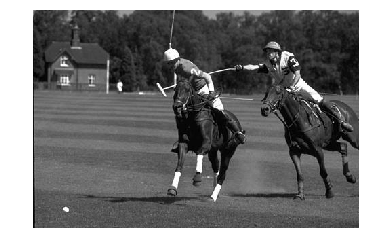

In [6]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib
import matplotlib.pyplot as plt
import cv2
img = imread('Image3.jpg')
#imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imggray = rgb2gray(img)
plt.imshow(imggray, cmap="gray")
plt.axis("off")

plt.show()

In [7]:
from scipy import signal as sig
import numpy as np

def gradient_x(imggray):
    ##Sobel operator kernels.
    sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, sobel_x, mode='same')
def gradient_y(imggray):
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, sobel_y, mode='same')

I_x = gradient_x(imggray)
I_y = gradient_y(imggray)

In [8]:
Ixx = I_x**2
Ixy = I_y*I_x
Iyy = I_y**2

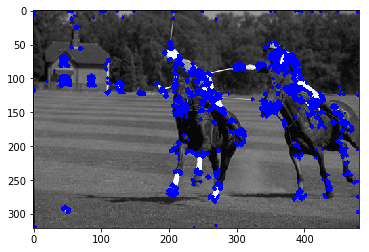

In [9]:
alpha = 0.03

height, width = imggray.shape
img_copy2=cv2.cvtColor(imggray, cv2.COLOR_GRAY2RGB)

harris_response = []
window_size = 3
offset = window_size//2
img_resp = np.zeros((height,width))
for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])
        
        #Find determinant and trace, use to get corner response
        det = (Sxx * Syy) - (Sxy**2)
        trace = Sxx + Syy
        r = det - alpha*(trace**2)
        if(r>10000000000):
            img_resp[y][x] = r
            cv2.circle(img_copy2,(x,y),2,(0, 0, 255),-1)
        else :
            img_resp[y][x] = 0
        harris_response.append((x,y,r))
cv2.imwrite("HW_1_Q_2_h_Solns/image_3_h_before.jpg",img_copy2)
plt.imshow(img_copy2)
plt.show()


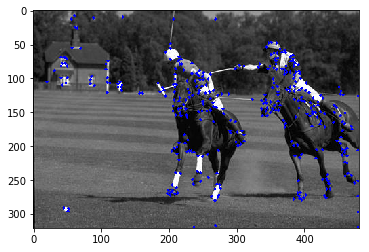

In [10]:

img_copy=cv2.cvtColor(imggray, cv2.COLOR_GRAY2RGB)
#print(img_copy.shape)
#img_copy = img
#plt.imshow(img_copy)
"""for response in harris_response:
    x, y, r = response
for y in range(0,height):
    for x in range(0,width):
        #1000000000000
        if img_resp[y][x] > 50000000000:
            #img_copy[y,x] = 250
            img_copy[y,x] = (250, 0 ,0)
            #print(img_copy[y,x]
"""
ws = 5
I = np.zeros((ws,ws))
for j in range(ws//2,height-(ws//2)):
    for i in range(ws//2,width-(ws//2)):
        check_arr = np.array(img_resp[j:j+ws, i:i+ws])
        maxpix = np.amax(check_arr)
        #print(maxpix)
        if(maxpix!=0):
            maxloc = np.where(check_arr == np.amax(check_arr))
            if(check_arr[ws//2][ws//2]==maxpix):
                #img_copy[j,i] = (0, 255, 0)
                cv2.circle(img_copy,(i+maxloc[1],j+maxloc[0]),2,(0, 0, 255),-1)
cv2.imwrite("HW_1_Q_2_h_Solns/image_3_h_after.jpg",img_copy)
plt.imshow(img_copy)
plt.show()